In [8]:
from skimage import data, io, draw
import skimage as ski
from skimage import feature
import cv2 as cv
import numpy as np

In [6]:
%matplotlib inline

In [3]:
def loadImgColor(path):
    img = cv.imread(path, cv.IMREAD_COLOR)
    return img

In [4]:
def loadImgGrey(path):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return img

In [5]:
def showImage(img):
    io.imshow(img)

In [6]:
path = "F:\Polibuda\semestr6\informatyka w medycynie - lab\Badanie dna oka"

In [9]:
imgC = loadImgColor(path + "\healthy\\01_h.jpg")

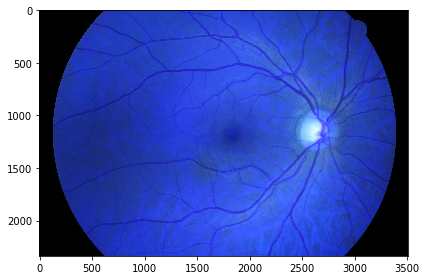

In [40]:
showImage(imgC)

In [10]:
imgC
g = imgC.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

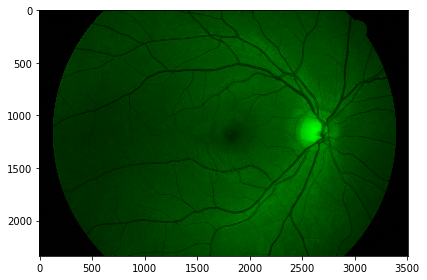

In [42]:
showImage(g)

In [11]:
grayG = cv.cvtColor(g, cv.COLOR_BGR2GRAY)


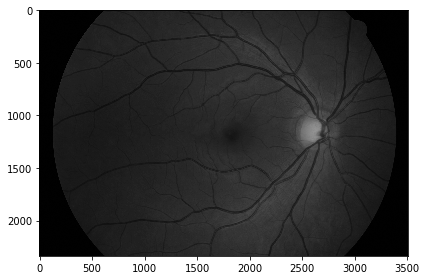

In [69]:
showImage(grayG)

In [45]:
img = loadImgGrey(path + "\healthy\\01_h.jpg")

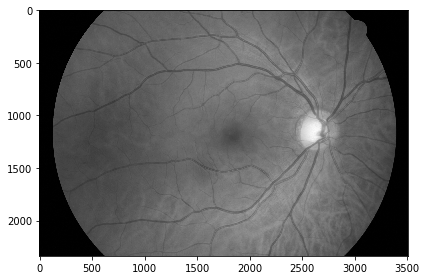

In [46]:
showImage(img)

In [89]:
#addaptive treshold
adaptiveGreen = cv.adaptiveThreshold(grayG,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,25,2)

In [50]:
#addaptive treshold
adaptiveGrey = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

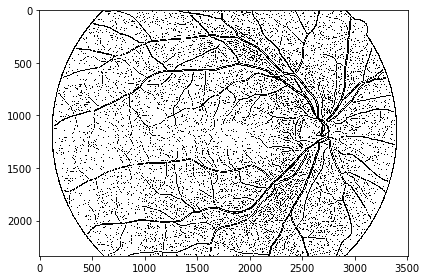

In [90]:
showImage(adaptiveGreen)

In [2]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

In [72]:
grayG

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

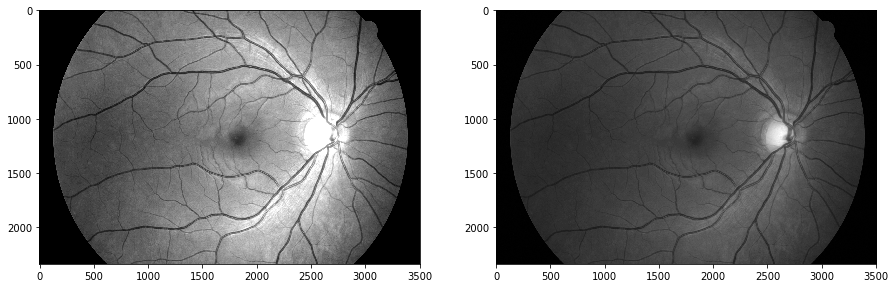

In [17]:
img = img_as_float(grayG)
MIN = 10 / 256
MAX = 70 / 256

norm = (img - MIN) / (MAX - MIN)
norm[norm > 1] = 1
norm[norm < 0] = 0

figure(figsize=(15,5))
subplot(1,2,1); plt.imshow(norm, cmap='gray')
subplot(1,2,2); plt.imshow(grayG, cmap='gray')

In [25]:
norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
img_grey = img_as_ubyte(norm)

e:\programy\python3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


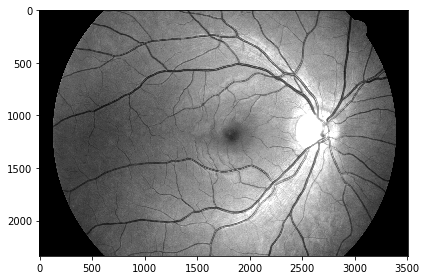

In [54]:
showImage(img_grey)

In [78]:
#addaptive treshold
adaptiveGreyNorm = cv.adaptiveThreshold(img_grey,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,25,8)

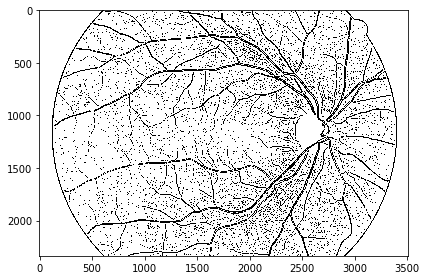

In [91]:
showImage(adaptiveGreyNorm)

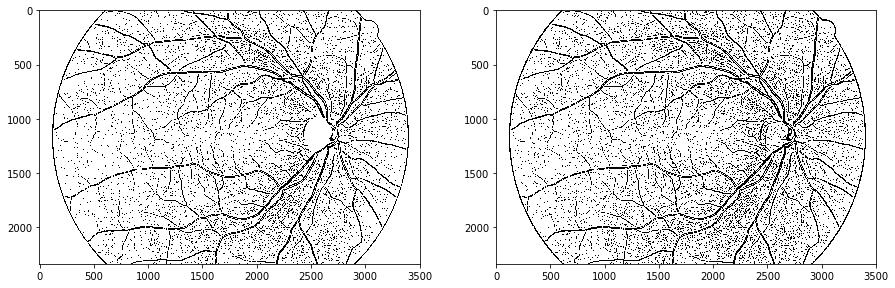

In [93]:
figure(figsize=(15,5))
subplot(1,2,1); plt.imshow(adaptiveGreyNorm, cmap='gray')
subplot(1,2,2); plt.imshow(adaptiveGreen, cmap='gray')

In [126]:
kernel = np.ones((5,5), np.uint8) 

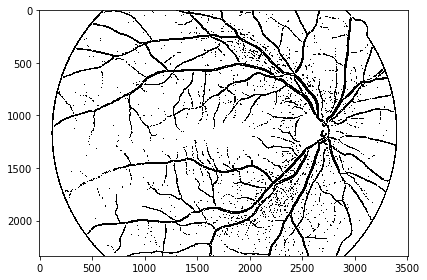

In [144]:
img_dilation = cv.dilate(adaptiveGreyNorm, kernel, iterations=1) 
img_erosion = cv.erode(img_dilation, kernel, iterations=2) 
showImage(img_erosion) 


In [148]:
inv = 255 - img_erosion

In [151]:
inv
#DONE

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [146]:
canny = ski.feature.canny(inv, sigma=1)

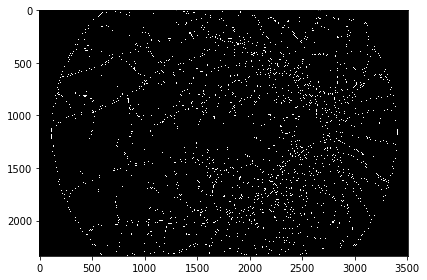

In [147]:
showImage(canny)

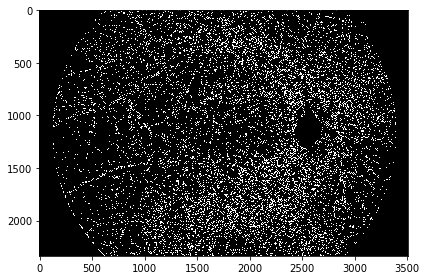

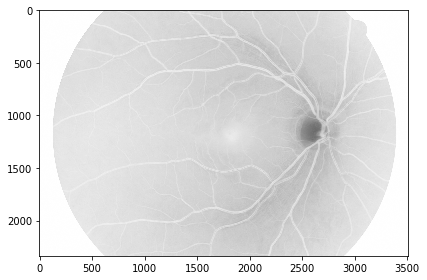

In [56]:
showImage(neg)

In [57]:
t = cv.adaptiveThreshold(neg,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

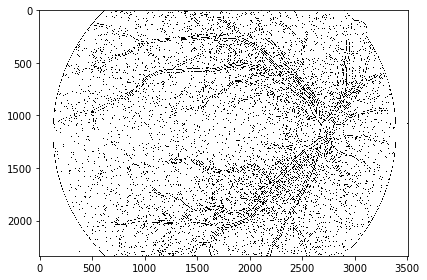

In [58]:
showImage(t)

In [ ]:
kernel = np.ones((3,3), np.uint8) 

In [ ]:
for line in img_dilation:
    for val in line:
        print(val)

In [ ]:
img_erosion = cv.erode(th2, kernel, iterations=1) 
img_dilation = cv.dilate(img_erosion, kernel, iterations=1) 

showImage(img_dilation) 


In [122]:
canny2 = ski.feature.canny(img_dilation, sigma=0)

In [36]:
canny2 = ski.feature.canny(th2, sigma=0)

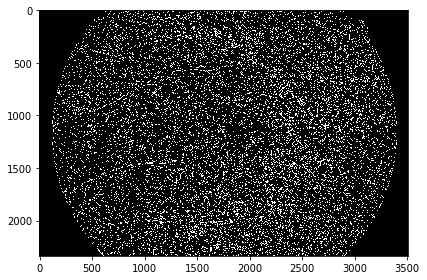

In [123]:
showImage(canny2)

In [96]:
alpha = 2
beta = 10


In [97]:
contrast = alpha*gray + beta

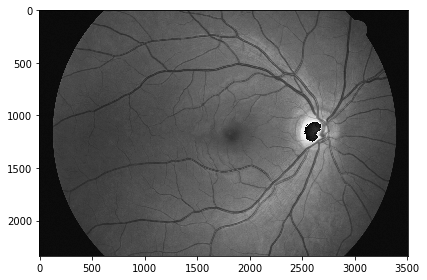

In [98]:
showImage(contrast)

In [99]:
th2 = cv.adaptiveThreshold(contrast,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

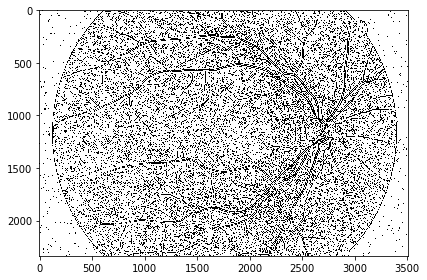

In [100]:
showImage(th2)